<a href="https://colab.research.google.com/github/naseem33/naseem33/blob/py/model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries:

In [1]:
# import libraties needed in this project:
import numpy as np 
import sklearn
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import pickle


Read Dataset:

In [2]:
# `read_csv()` function to read in data
df=pd.read_csv("brain_stroke.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
# get info for data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.shape

(4981, 11)


Cleaning The Data

In [7]:
# check columns names
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
# check null values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
# check the unique values 
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [11]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


drop unimportant column:

In [12]:
# drop 'ever_married','work_type','Residence_type' column
df.drop(['ever_married','work_type','Residence_type'], axis = 1, inplace = True)

# After Droping irrelevant features 
df.head()


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1


Transform Catagorical Data to 0 & 1:

In [13]:
# change 'gender' data type from object to int
df['gender'].replace(['Male','Female'],[0,1],inplace=True)
df['gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

Convert Categorical Data to Numbers:

In [14]:
# change 'smoking_status' data type from object to int
df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,2,3],inplace=True)
df['smoking_status'].head()

0    0
1    1
2    2
3    1
4    0
Name: smoking_status, dtype: int64

In [15]:
df.count()

gender               4981
age                  4981
hypertension         4981
heart_disease        4981
avg_glucose_level    4981
bmi                  4981
smoking_status       4981
stroke               4981
dtype: int64

In [16]:
# check after cleaning
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Visualizing The Data:

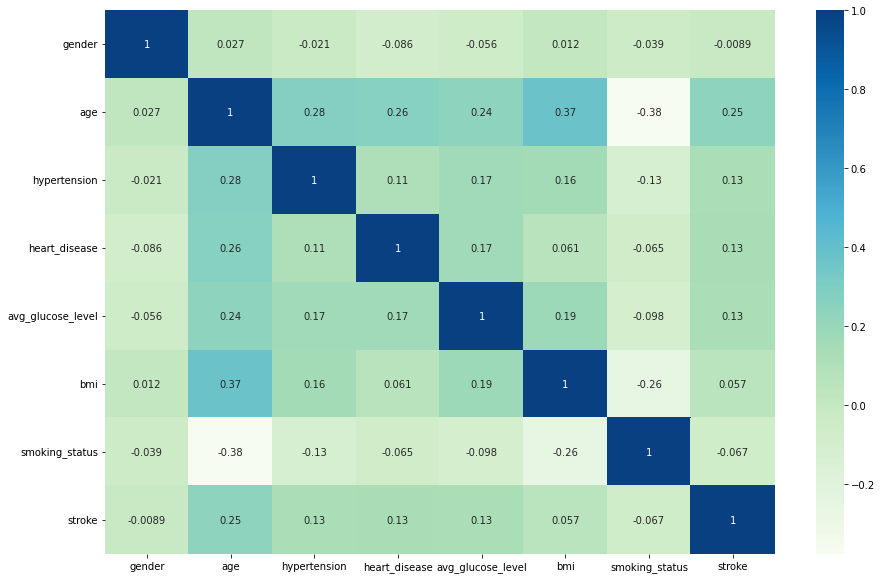

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True ,cmap = 'GnBu')

Distribution of AGE - GLUCOSE LEVEL - BMI:

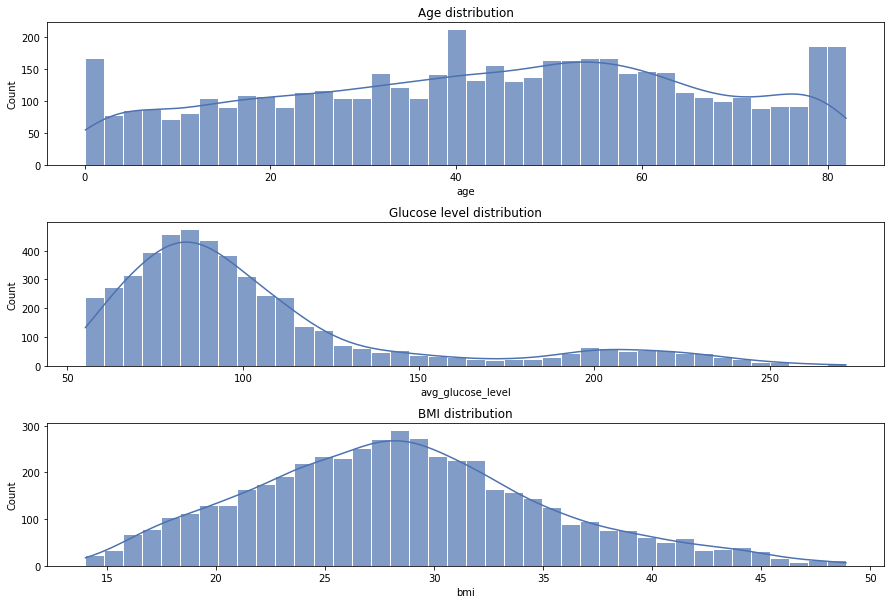

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(15,10))
plt.subplots_adjust(hspace=0.4)
sns.set_theme()

axes[0].set_title('Age distribution')
sns.histplot(df['age'], bins=40, kde=True, alpha=0.7, ax=axes[0])

axes[1].set_title('Glucose level distribution')
sns.histplot(df['avg_glucose_level'], bins=40, kde=True, alpha=0.7, ax=axes[1])

axes[2].set_title('BMI distribution')
sns.histplot(df['bmi'], bins=40, kde=True, alpha=0.7, ax=axes[2])


CATEGORICAL DATA:

In [19]:
labels=['male', 'female']
values= [len(df['gender'].loc[df['gender'] == 0]), len(df['gender'].loc[df['gender'] == 1])]
colors = ['#0066CC', '#CCFFCC']

fig = go.Figure(data=[go.Pie(
    labels=labels, title="gender",
    values=values, pull=[0.1, 0, 0 ],
    marker=dict(colors=colors, 
                line=dict(color='black', 
                          width=3))
)])
fig.show()

In [20]:
labels=['No hypertension', 'hypertension']
values= [len(df['hypertension'].loc[df['hypertension'] == 0]), len(df['hypertension'].loc[df['hypertension'] == 1])]
colors = ['#0066CC', '#CCFFCC']

fig = go.Figure(data=[go.Pie(
    labels=labels, title="HYPERTENSION",
    values=values, pull=[0.1, 0, 0 ],
    marker=dict(colors=colors, 
                line=dict(color='black', 
                          width=3))
)])
fig.show()


In [21]:
labels=['No stroke', 'stroke']
values= [len(df['stroke'].loc[df['stroke'] == 0]), len(df['stroke'].loc[df['stroke'] == 1])]
colors = ['#0066CC', '#CCFFCC']

fig = go.Figure(data=[go.Pie(
    labels=labels, title="STROKE",
    values=values, pull=[0.1, 0, 0 ],
    marker=dict(colors=colors, 
                line=dict(color='black', 
                          width=2))
)])
fig.show()

select split parameter:

In [22]:
target = 'stroke'
X = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]

In [23]:
# splitting into train and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

In [24]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((3984, 7), (997, 7), (3984, 1), (997, 1))

Starting by removing the imbalance class problem.
 
Using SMOTE algorithm:


0    4733
1     248
Name: stroke, dtype: int64


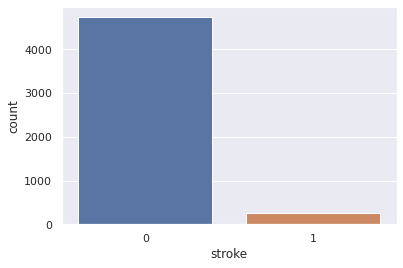

In [25]:
ax = sns.countplot(x=target,data=df)
print(df[target].value_counts())

In [26]:
percentage_no_stroke = 100*(4733/float(df.shape[0]))
percentage_no_stroke

95.0210801043967

In [27]:
percentage_yes_stroke = 100*(248/float(df.shape[0]))
percentage_yes_stroke


4.978919895603292

In [28]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

1    4733
0    4733
Name: stroke, dtype: int64


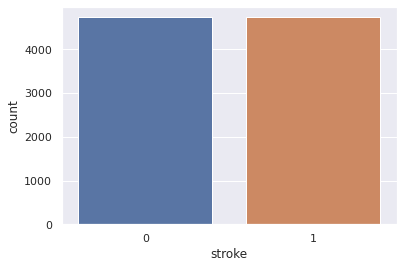

In [29]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [30]:
# splitting into train and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

In [31]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7572, 7), (1894, 7), (7572, 1), (1894, 1))

Data Scaling:

In [32]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

 Data Modeling:

Logistic Regression Model.

In [33]:
#LogisticRegression
log_reg=LogisticRegression(random_state=5)
log_reg.fit(X_train,Y_train)
Y_pred=log_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [34]:
cm=confusion_matrix(Y_test,Y_pred)

In [35]:
print(cm)

[[721 214]
 [167 792]]


In [36]:
print('Training-set accuracy score:', log_reg.score(X_train, Y_train))

Training-set accuracy score: 0.7931854199683043


RandomForestClassifier.

In [37]:
rand_clf=RandomForestClassifier(n_estimators=20,criterion="entropy")
rand_clf.fit(X_train,Y_train)
Y_pred=rand_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [38]:
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[854  81]
 [ 64 895]]


In [39]:
print('Training-set accuracy score:', rand_clf.score(X_train, Y_train))

Training-set accuracy score: 0.998283148441627


DecisionTreeClassifier.

In [40]:
dec_clf=DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=5)
dec_clf.fit(X_train,Y_train)
Y_pred=dec_clf.predict(X_test)

In [41]:
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[667 268]
 [ 68 891]]


In [42]:
print('Training-set accuracy score:', dec_clf.score(X_train, Y_train))

Training-set accuracy score: 0.819202324352879


KNeighbors Classifier.

In [43]:
k_nn=KNeighborsClassifier()
k_nn.fit(X_train,Y_train)
Y_pred=k_nn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [44]:
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[755 180]
 [ 77 882]]


In [45]:
print('Training-set accuracy score:', k_nn.score(X_train, Y_train))

Training-set accuracy score: 0.9010829371368199


In [46]:
pickle.dump(log_reg, open("model3.pkl", "wb"))